<span style="color:darkblue"><span style="font-size: 32px;">**Лабораторная работа №1: Проведение разведочного анализа данных.**</span></span>

<span style="color:darkblue">Цель</span>: Провести разведочный анализ выбранного набора данных.

<span style="color:darkblue">Задачи</span>: Выбрать набор табличных данных (например на сайте kaggle.com / huggingface.co/datasets), набор данных должен содержать не менее 10 столбцов и 1000 строк различных типов. Определить характеристики набора данных (типы данных, размер набора данных, наличие пропусков, дубликатов, категориальных переменных). Провести корреляционный анализ признаков и вывести корреляционную матрицу. Построить различные визуализации для признаков (не менее 5 различных). Сделать выводы по полученным результатам.

<span style="color:darkblue"><span style="font-size: 24px;">**1. Введение**</span></span>

В данном отчете проводится анализ данных о членстве в фитнес-клубе. Цель анализа — выявить основные характеристики членов клуба, понять взаимосвязи между различными переменными и сделать выводы, которые могут помочь в улучшении услуг клуба.

<span style="color:darkblue"><span style="font-size: 24px;">**2. Импорт библиотек и загрузка данных**</span></span>


In [1]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Для отображения графиков внутри ноутбука
%matplotlib inline

# Загрузка данных
data = pd.read_csv(r'D:\lab1.интелект.анализ\gym_membership.csv') 

<span style="color:darkblue">Комментарий</span>:
Мы используем библиотеки **pandas** для обработки данных, **seaborn** и **matplotlib** для визуализации. Данные загружаются из файла <span style="color:green">gym_membership.csv</span>.

<span style="color:darkblue"><span style="font-size: 24px;">**3.Обзор данных**</span></span>


In [2]:
# Определение характеристик набора данных
def data_overview(df):
    print("Характеристики набора данных:")
    print("-" * 40)
    print(f"Размер набора данных: {df.shape}")
    print("\nТипы данных:")
    print(df.dtypes)
    print("\nПропуски в данных:")
    print(df.isnull().sum())
    print("\nДубликаты в данных:", df.duplicated().sum())

    # Определение категориальных переменных
    categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
    print("\nКатегориальные переменные:", categorical_columns.tolist())

data_overview(data)


Характеристики набора данных:
----------------------------------------
Размер набора данных: (1000, 15)

Типы данных:
id                        int64
first_name               object
gender                   object
birthday                 object
Age                       int64
abonoment_type           object
visit_per_week            int64
days_per_week            object
attend_group_lesson        bool
fav_group_lesson         object
avg_time_check_in        object
avg_time_check_out       object
avg_time_in_gym           int64
personal_training          bool
name_personal_trainer    object
dtype: object

Пропуски в данных:
id                         0
first_name                 0
gender                     0
birthday                   0
Age                        0
abonoment_type             0
visit_per_week             0
days_per_week              0
attend_group_lesson        0
fav_group_lesson         497
avg_time_check_in          0
avg_time_check_out         0
avg_time_in_gym     

<span style="color:darkblue">Комментарий</span>:
Функция <span style="color:green">**data_overview**</span> выводит основные характеристики набора данных, включая размер, типы данных, количество пропусков и дубликатов, а также список категориальных переменных.


<span style="color:darkblue"><span style="font-size: 24px;">**4. Корреляционный анализ**</span></span>


Корреляционная матрица:
                       id       Age  visit_per_week  avg_time_in_gym
id               1.000000  0.008680        0.028761         0.008968
Age              0.008680  1.000000       -0.041088         0.065408
visit_per_week   0.028761 -0.041088        1.000000         0.065868
avg_time_in_gym  0.008968  0.065408        0.065868         1.000000


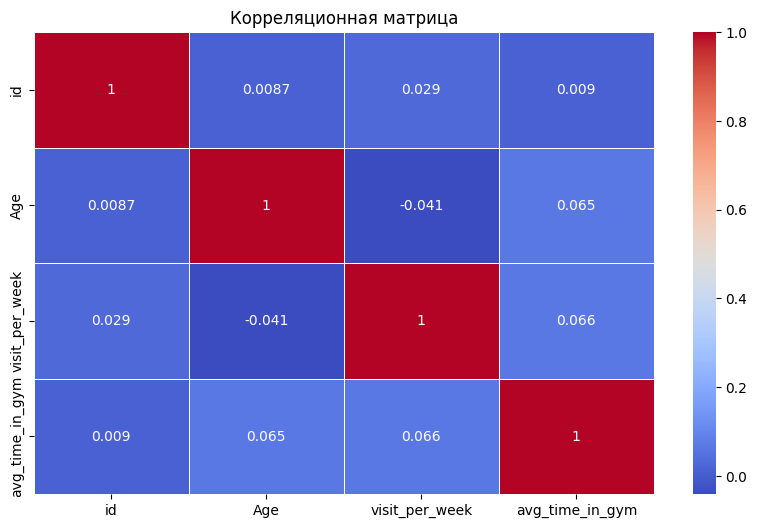

In [3]:
# Корреляционный анализ для числовых переменных
correlation_matrix = data.select_dtypes(include=['int64', 'float64']).corr()

print("\nКорреляционная матрица:")
print(correlation_matrix)

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

<span style="color:darkblue">Комментарий</span>:
Корреляционная матрица показывает взаимосвязь между числовыми переменными. Значения близкие к 1 или -1 указывают на сильную положительную или отрицательную корреляцию соответственно.


<span style="color:darkblue"><span style="font-size: 24px;">**5 Визуализация данных**</span></span>

<span style="color:darkblue"><span style="font-size: 18px;">**5.1 Распределение возраста**</span></span>

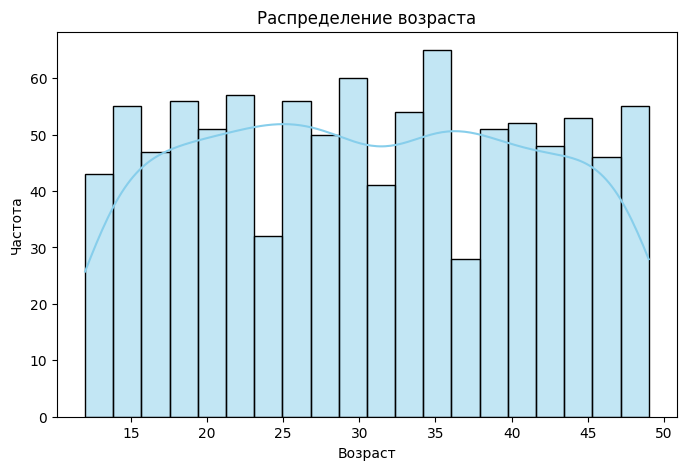

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()


<span style="color:darkblue">Комментарий</span>:
Гистограмма показывает распределение возраста членов клуба. Наличие пиковых значений может указывать на популярность клуба среди определенных возрастных групп.

<span style="color:darkblue"><span style="font-size: 18px;">**5.2 Количество посещений в неделю в зависимости от типа абонемента**</span></span>

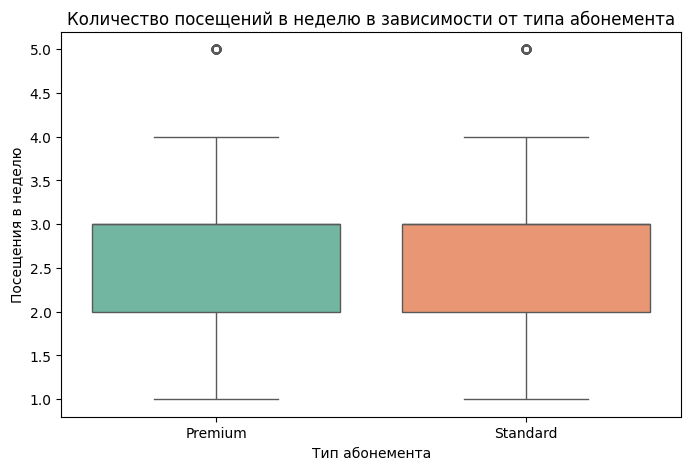

In [5]:
# 2. Количество посещений в неделю в зависимости от типа абонемента
plt.figure(figsize=(8, 5))
sns.boxplot(x='abonoment_type', y='visit_per_week', data=data, hue='abonoment_type', palette='Set2', legend=False)
plt.title('Количество посещений в неделю в зависимости от типа абонемента')
plt.xlabel('Тип абонемента')
plt.ylabel('Посещения в неделю')
plt.show()


<span style="color:darkblue">Комментарий</span>:
Диаграмма размаха (boxplot) демонстрирует распределение количества посещений в неделю для разных типов абонементов. Это позволяет выявить, какой тип абонемента способствует более частым посещениям.

<span style="color:darkblue"><span style="font-size: 18px;">**5.3 Соотношение посещений групповых занятий**</span></span>

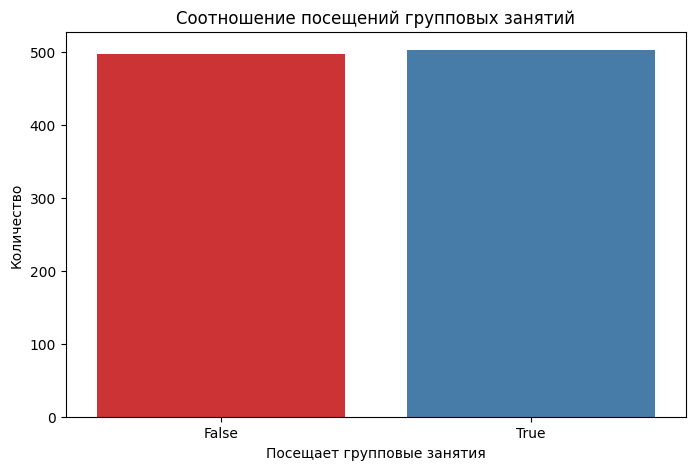

In [6]:
# 3. Соотношение посещений групповых занятий
plt.figure(figsize=(8, 5))
sns.countplot(x='attend_group_lesson', data=data, hue='attend_group_lesson', palette='Set1', legend=False)
plt.title('Соотношение посещений групповых занятий')
plt.xlabel('Посещает групповые занятия')
plt.ylabel('Количество')
plt.show()

<span style="color:darkblue">Комментарий</span>:
Столбчатая диаграмма показывает, какая часть членов клуба посещает групповые занятия. Это важно для понимания востребованности групповых программ.

<span style="color:darkblue"><span style="font-size: 18px;">**5.4 Распределение среднего времени в зале в зависимости от пола**</span></span>

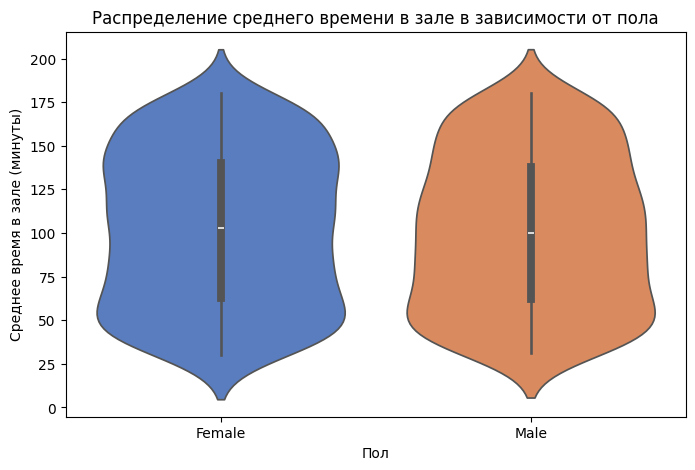

In [7]:
# 4. Распределение среднего времени в зале в зависимости от пола
plt.figure(figsize=(8, 5))
sns.violinplot(x='gender', y='avg_time_in_gym', data=data, hue='gender', palette='muted', legend=False)

plt.title('Распределение среднего времени в зале в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Среднее время в зале (минуты)')
plt.show()

<span style="color:darkblue">Комментарий</span>:
Скрипичный график (violin plot) показывает распределение среднего времени, проводимого в зале, для разных полов. Это помогает выявить, есть ли различия в активности между мужчинами и женщинами.

<span style="color:darkblue"><span style="font-size: 18px;">**5.5 Количество персональных тренировок**</span></span>

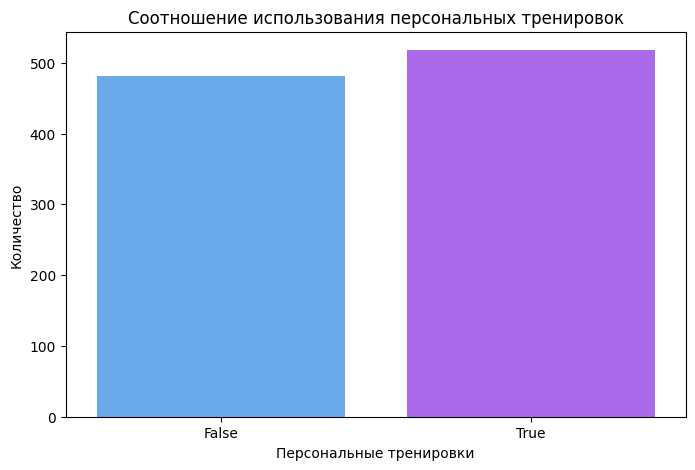

In [8]:
# 5. Количество персональных тренировок
plt.figure(figsize=(8, 5))
sns.countplot(x='personal_training', data=data, hue='personal_training', palette='cool', legend=False)
plt.title('Соотношение использования персональных тренировок')
plt.xlabel('Персональные тренировки')
plt.ylabel('Количество')
plt.show()

<span style="color:darkblue">Комментарий</span>:
Столбчатая диаграмма показывает, какой процент членов клуба пользуется услугами персональных тренировок. Это важно для оценки востребованности дополнительных услуг.

<span style="color:darkblue"><span style="font-size: 24px;">**6.Выводы**</span></span>

На основе проведенного анализа можно сделать следующие выводы:

**1. Возрастная структура:** Возраст пользователей в основном варьируется в пределах 25-50 лет, с пиком около 40 лет.

**2. Влияние типа абонемента на посещаемость:** Владельцы абонементов типа Premium чаще посещают зал по сравнению с владельцами стандартных абонементов.

**3. Популярность групповых занятий:** Примерно половина пользователей посещает групповые занятия.

**4. Время, проводимое в зале по полу:** Мужчины и женщины проводят в зале схожее количество времени, но мужчины имеют немного больший разброс по времени.

**5. Использование персональных тренировок:** Около половины пользователей пользуются услугами персональных тренеров.

- Большинство пользователей предпочитают индивидуальные тренировки и проводит в зале схожее количество времени независимо от пола.
- Premium-абонементы способствуют более частым посещениям зала.

**Рекомендации:**
- Развитие абонементов типа premium: Увеличить количество предложений по наиболее востребованным типам абонементов.
- Усиление групповых программ: Расширить расписание групповых занятий и предложить новые виды тренировок.
- Персонализированные услуги: Рассмотреть возможность продвижения персональных тренировок для увеличения их популярности.